In [34]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
sapling = ADatabase("sapling")

In [36]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

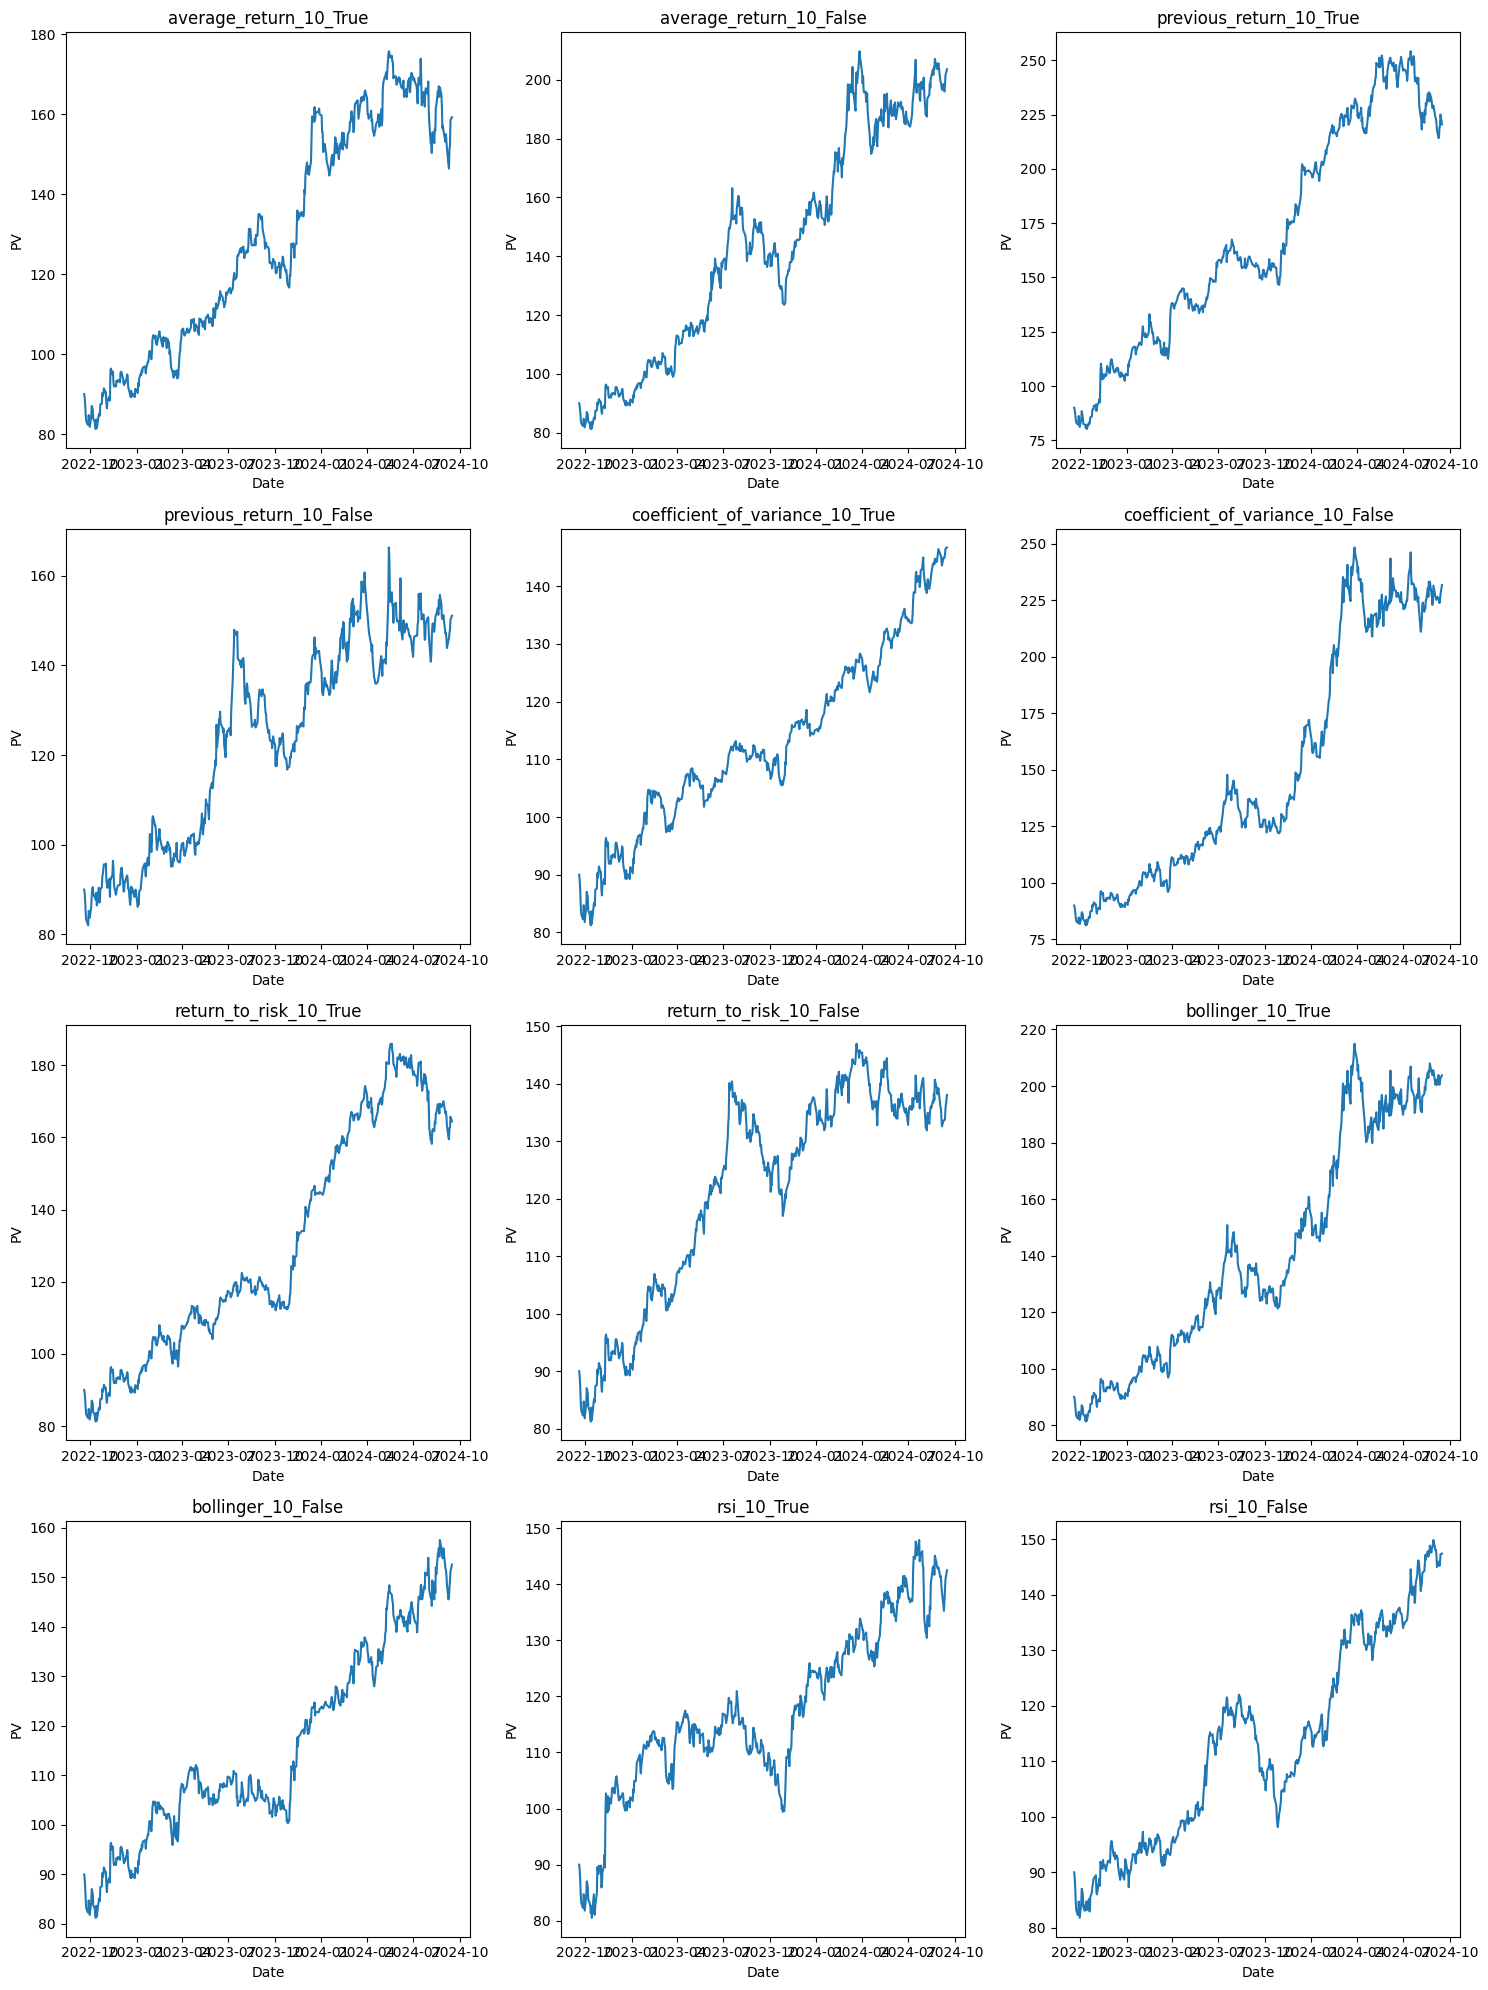

In [37]:
analysis = []

# Assuming trades DataFrame is already defined
trades["pv"] = trades["adjclose"] * trades["quantity"]

# Get unique values
names = trades["name"].unique()
positions = [10]
booleans = [True, False]

# Calculate the number of plots
num_plots = len(names) * len(positions) * len(booleans)
num_columns = 3
num_rows = -(-num_plots // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

plot_index = 0
for name in names:
    for position in positions:
        for boolean in booleans:
            portfolio = trades.pivot_table(index=["date", "name", "positions", "boolean"], 
                                           columns="position", values="pv").reset_index()
            portfolio = portfolio[(portfolio["name"] == name) & 
                                  (portfolio["positions"] == position) & 
                                  (portfolio["boolean"] == boolean)]
            if position == 1:
                portfolio["pv"] = portfolio[0]
            else:
                portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) 
                                   for row in portfolio.iterrows()]
            stuff = {}
            stuff["name"] = name
            stuff["position"] = position
            stuff["boolean"] = boolean
            stuff["pv"] = portfolio["pv"].iloc[-1].item()
            stuff["std"] = portfolio["pv"].std()
            analysis.append(stuff)
            # Plotting
            ax = axes[plot_index]
            ax.plot(portfolio["date"].values, portfolio["pv"].values)
            ax.set_title(f"{name}_{position}_{boolean}")
            ax.set_xlabel('Date')
            ax.set_ylabel('PV')
            
            plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [38]:
a = pd.DataFrame(analysis)
a["risk_to_return"] = a["pv"] / a["std"]
a.sort_values("risk_to_return",ascending=False)

,name,position,boolean,pv,std,risk_to_return
10,rsi,10,True,142.47,15.096245,9.437446
4,coefficient_of_variance,10,True,146.70,15.915529,9.217413
11,rsi,10,False,147.42,18.519351,7.960322
9,bollinger,10,False,152.55,19.471328,7.834597
7,return_to_risk,10,False,138.06,18.475665,7.472532
3,previous_return,10,False,151.11,22.837600,6.616720
0,average_return,10,True,159.30,28.337359,5.621554
1,average_return,10,False,203.58,38.471754,5.291674
6,return_to_risk,10,True,164.43,31.530405,5.214966
8,bollinger,10,True,203.76,40.031332,5.090013


In [39]:
trade_analysis = trades[(trades["name"]=="previous_return") & (trades["positions"]==1) & (trades["boolean"]==True)]
trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]

In [40]:
trade_analysis.sort_values("return",ascending=False)

,side,type,time_in_force,symbol,notional,adjclose,quantity,buy_date,buy_price,date,position,name,positions,boolean,pv,return
